In [1751]:
import numpy as np 
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [1752]:
hava_kalite_data = pd.read_csv('air_index.csv')

In [1753]:
hava_kalite_data.head() 

,Rank,Countries,City,2022,JAN,FEB,MAR,APR,MAY,JUN,...,AUG,SEP,OCT,NOV,DEC,2021,2020,2019,2018,2017
0,1,Pakistan,Lahore,97.4,133.0,102.5,85.6,69.3,60.9,52.1,...,46.2,64.2,123.2,190.5,192.9,86.5,79.2,89.5,114.9,133.2
1,2,China,Hotan,94.3,61.7,91.6,132.7,106.2,120.5,69.5,...,75.0,65.1,75.0,50.3,120.0,101.5,110.2,110.1,116.0,91.9
2,3,India,Bhiwadi,92.7,110.6,98.0,116.2,149.5,123.8,102.8,...,36.5,59.9,85.4,111.4,86.9,106.2,95.5,83.4,125.4,NaN
3,4,India,Delhi (NCT),92.6,141.0,100.9,91.0,98.0,73.2,56.2,...,31.1,38.3,99.7,176.8,171.9,96.4,84.1,98.6,113.5,108.2
4,5,Pakistan,Peshawar,91.8,110.2,103.5,78.3,68.5,53.5,56.3,...,57.8,79.0,100.0,132.0,212.1,89.6,NaN,63.9,NaN,NaN


In [1754]:
df=hava_kalite_data[["Rank",	"Countries",	"City",	"2022","2021",	"2020",	"2019",	"2018",	"2017"]]

In [1755]:
df.head()

,Rank,Countries,City,2022,2021,2020,2019,2018,2017
0,1,Pakistan,Lahore,97.4,86.5,79.2,89.5,114.9,133.2
1,2,China,Hotan,94.3,101.5,110.2,110.1,116.0,91.9
2,3,India,Bhiwadi,92.7,106.2,95.5,83.4,125.4,NaN
3,4,India,Delhi (NCT),92.6,96.4,84.1,98.6,113.5,108.2
4,5,Pakistan,Peshawar,91.8,89.6,NaN,63.9,NaN,NaN


In [1756]:
df.iloc[2].fillna(0)

Rank               3
Countries      India
City         Bhiwadi
2022            92.7
2021           106.2
2020            95.5
2019            83.4
2018           125.4
2017               0
Name: 2, dtype: object

In [1757]:
df=df.fillna(method="ffill")

In [1758]:
df.dropna(axis=0)

,Rank,Countries,City,2022,2021,2020,2019,2018,2017
0,1,Pakistan,Lahore,97.4,86.5,79.2,89.5,114.9,133.2
1,2,China,Hotan,94.3,101.5,110.2,110.1,116.0,91.9
2,3,India,Bhiwadi,92.7,106.2,95.5,83.4,125.4,91.9
3,4,India,Delhi (NCT),92.6,96.4,84.1,98.6,113.5,108.2
4,5,Pakistan,Peshawar,91.8,89.6,84.1,63.9,113.5,108.2
...,...,...,...,...,...,...,...,...,...
7318,7319,USA,Castroville,0.8,7.5,8.0,5.5,6.0,8.1
7319,7320,USA,Wilson,0.8,7.7,8.0,5.5,6.0,8.1
7320,7321,USA,Roanoke Rapids,0.6,2.9,8.0,7.1,6.0,8.1
7321,7322,Indonesia,Kuta,0.5,9.8,13.0,7.1,6.0,8.1


In [1759]:
df.sample(3)

,Rank,Countries,City,2022,2021,2020,2019,2018,2017
3289,3290,USA,Mukwonago,9.9,10.0,9.8,12.1,10.8,11.0
4038,4039,USA,Tonasket,8.9,15.4,10.1,6.2,8.0,8.1
7238,7239,Australia,Ouyen,2.0,2.5,3.0,5.7,2.2,1.9


In [1760]:
dftr=df[df["Countries"]=="Turkey"]

In [1761]:
dftr.head(5)

,Rank,Countries,City,2022,2021,2020,2019,2018,2017
82,83,Turkey,Igdir,53.0,66.2,49.2,59.0,76.1,74.1
238,239,Turkey,Gaziantep,40.2,27.3,47.0,52.6,57.6,70.5
296,297,Turkey,Duzce,36.8,44.4,33.3,46.0,51.4,62.6
324,325,Turkey,Mersin,35.3,32.5,24.7,34.4,65.2,88.7
349,350,Turkey,Konya,34.5,33.8,30.7,33.2,45.3,48.5


In [1762]:
dftr.tail(5)

,Rank,Countries,City,2022,2021,2020,2019,2018,2017
2187,2188,Turkey,Bagirkanli,12.1,11.0,10.5,11.6,12.5,10.4
2215,2216,Turkey,Bilecik,12.0,16.4,15.8,17.8,13.9,15.3
2879,2880,Turkey,Kireshir,10.5,9.8,9.4,10.9,12.8,13.5
3818,3819,Turkey,Cankiri,9.1,9.3,19.5,19.7,10.1,8.9
5757,5758,Turkey,Kuyulusebil,6.6,7.3,6.9,7.2,7.0,8.4


In [1763]:
def Sehirgetir(sehir):
    return df[df["City"]==sehir]
Sehirgetir("")

,Rank,Countries,City,2022,2021,2020,2019,2018,2017


In [1764]:
dfgr=df.groupby(by=["Countries"]).mean()

In [1765]:
dfgr.head(3)

,Rank,2022,2021,2020,2019,2018,2017
Countries,,,,,,,
Afghanistan,1347.0,17.1,37.5,46.5,58.8,61.8,25.0
Albania,1698.0,14.5,12.5,16.0,7.6,22.9,26.5
Algeria,1260.0,17.8,20.0,20.2,21.2,21.7,29.6


In [1766]:
dfgr.drop(columns=["Rank","2021"])

,2022,2020,2019,2018,2017
Countries,,,,,
Afghanistan,17.100,46.50,58.800,61.800,25.00
Albania,14.500,16.00,7.600,22.900,26.50
Algeria,17.800,20.20,21.200,21.700,29.60
Andorra,5.400,7.40,7.100,6.100,5.70
Angola,8.800,13.00,15.900,10.400,13.10
...,...,...,...,...,...
Uruguay,11.300,11.70,11.700,10.000,11.10
Uzbekistan,33.500,29.90,41.200,34.300,17.50
Venezuela,4.400,7.30,2.800,4.300,3.80


In [1767]:
dfgr["2022"].sort_values()

Countries
Guam                    1.300000
French Polynesia        2.500000
U.S. Virgin Islands     2.850000
Bermuda                 3.000000
Bonaire                 3.300000
                         ...    
Burkina Faso           63.000000
Bangladesh             65.800000
Bahrain                66.600000
Pakistan               69.257143
Chad                   89.700000
Name: 2022, Length: 133, dtype: float64

<AxesSubplot:xlabel='Countries'>

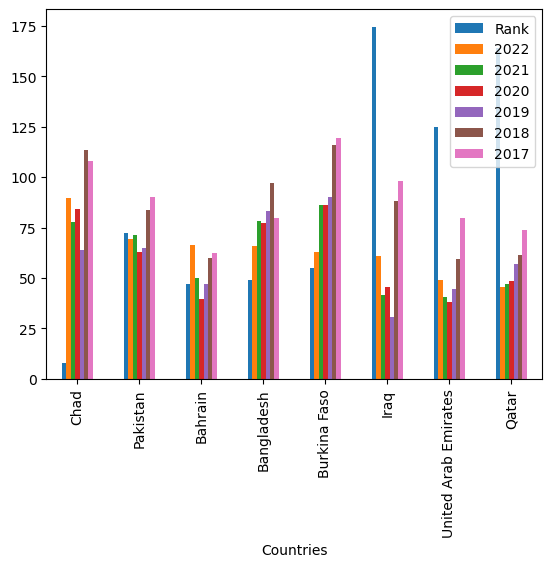

In [1768]:
dfgr.sort_values(by=["2022","2021"],ascending=False).iloc[:8].plot.bar()

In [1769]:
hava_kalite_data.head() 

,Rank,Countries,City,2022,JAN,FEB,MAR,APR,MAY,JUN,...,AUG,SEP,OCT,NOV,DEC,2021,2020,2019,2018,2017
0,1,Pakistan,Lahore,97.4,133.0,102.5,85.6,69.3,60.9,52.1,...,46.2,64.2,123.2,190.5,192.9,86.5,79.2,89.5,114.9,133.2
1,2,China,Hotan,94.3,61.7,91.6,132.7,106.2,120.5,69.5,...,75.0,65.1,75.0,50.3,120.0,101.5,110.2,110.1,116.0,91.9
2,3,India,Bhiwadi,92.7,110.6,98.0,116.2,149.5,123.8,102.8,...,36.5,59.9,85.4,111.4,86.9,106.2,95.5,83.4,125.4,NaN
3,4,India,Delhi (NCT),92.6,141.0,100.9,91.0,98.0,73.2,56.2,...,31.1,38.3,99.7,176.8,171.9,96.4,84.1,98.6,113.5,108.2
4,5,Pakistan,Peshawar,91.8,110.2,103.5,78.3,68.5,53.5,56.3,...,57.8,79.0,100.0,132.0,212.1,89.6,NaN,63.9,NaN,NaN


In [1770]:
data_selected = hava_kalite_data[
    ["Rank", 
     "Countries", 
     "City", 
     "2022", 
     "JAN", 
     "FEB", 
     "MAR", 
     "APR",
     "MAY",
     "JUN",       
     "AUG", 
     "SEP",     
     "OCT",                
     "NOV",             
     "DEC"  ]
    ]

In [1771]:
G = nx.Graph()

In [1772]:
for index, row in hava_kalite_data.iterrows():
    country = row["Countries"]
    rank = row["Rank"]
    
    # Şehir düğümlerini ekleyelim
    G.add_node(country, rank=rank)
    
    # Her şehri "Rank" düğümüne bağlayalım
    G.add_edge("Rank", country, weight=rank)

C:\Users\Didar\AppData\Local\Temp\ipykernel_18100\1948845883.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


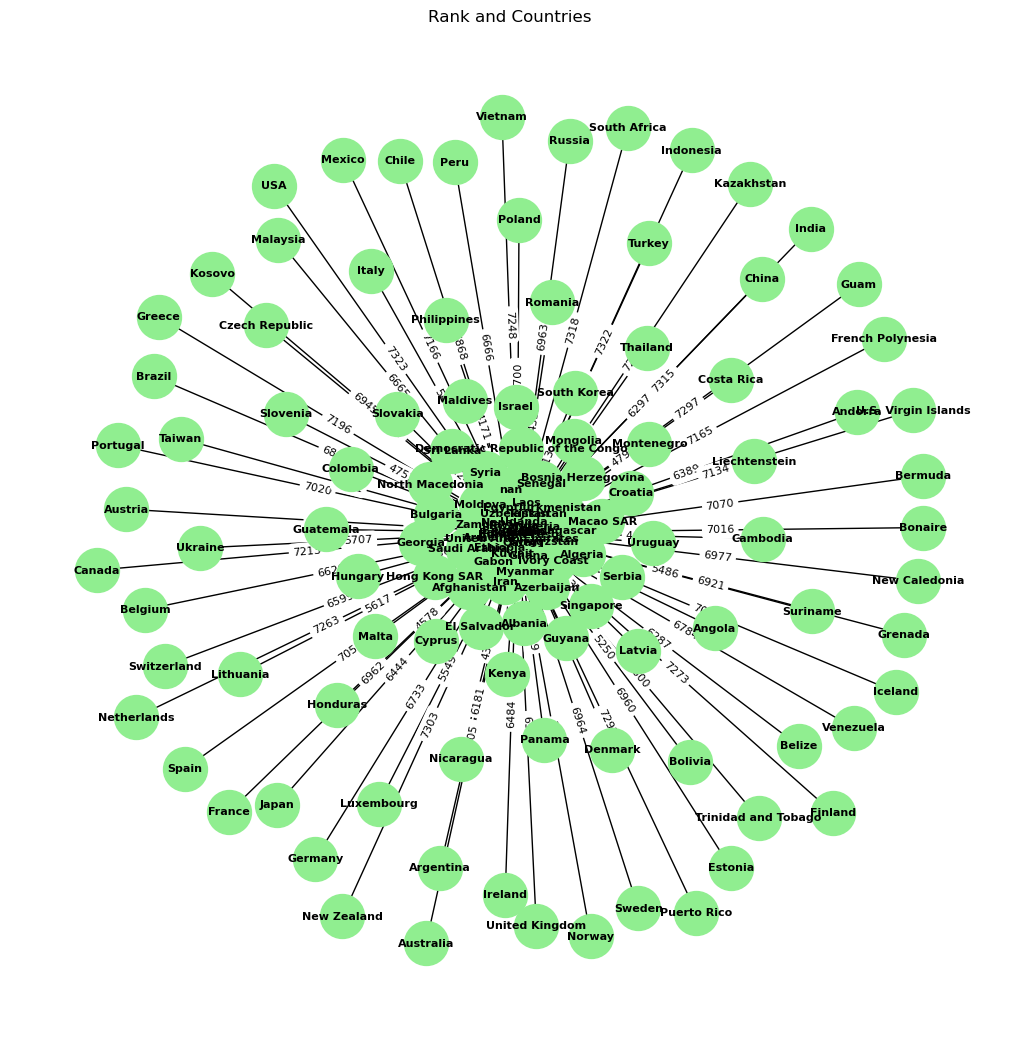

In [1773]:
# Grafı çizdirelim
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightgreen', font_size=8, font_weight='bold')

# Kenar etiketlerini ekleyelim
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Çizimi gösterelim
plt.title("Rank and Countries")
plt.tight_layout()
plt.show()